<h1 style="text-align:center;">
Sentiment Analysis
</h1> 
Carry out sentiment analysis on the Harry Potter Book reviews to later identify the users likes and dislikes

### Table Of Contents:
* [The Dataset](#1)
* [The Sentiment Analysis](#2)

## **1** The Dataset <a class="anchor" id="1"></a>
Have a look at the dataset and keep only the columns you might want to use

In [1]:
## Import Modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import os #controls opearting system
import itertools
from collections import Counter # to count the occurence of terms (coulduse gensim?)

import re
import string # get list of punctuation

# Natural Language tokenizer
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

#Modelling
from sklearn.feature_extraction.text import CountVectorizer # explained later
from sklearn.linear_model import LogisticRegression

In [2]:
# Read in the data
data = r'data/goodreads_reviews_edits.csv'
df=pd.read_csv(data)
df.review = df.review.fillna('')

In [5]:
# Have a look
df.head()

,user_id,user,user_link,book_id,book,book_link,rating,review,review_id,review_link,review_date,images,image_links,likes,comments
0,23061285,Voldemort,https://www.goodreads.com/user/show/23061285-v...,72193,Harry Potter and the Philosopher’s Stone,https://www.goodreads.com/book/show/72193,1,This is a disgrace to all pure bloods. My head...,6.953423e+08,https://www.goodreads.com/review/show/695342270,2013-08-15,0,[],9254,33
1,105351,Harold Bloom,https://www.goodreads.com/user/show/105351-har...,72193,Harry Potter and the Philosopher’s Stone,https://www.goodreads.com/book/show/72193,1,Can 35 Million Book Buyers Be Wrong? Yes.Takin...,1.530857e+06,https://www.goodreads.com/review/show/1530857,2007-05-30,0,[],421,4
2,96210903,dorian ♕ ♕,https://www.goodreads.com/user/show/96210903-d...,72193,Harry Potter and the Philosopher’s Stone,https://www.goodreads.com/book/show/72193,1,We don't support transphobes in this house,2.790762e+09,https://www.goodreads.com/review/show/2790761901,2021-02-02,0,[],340,19
3,2658311,notgettingenough,https://www.goodreads.com/user/show/2658311-no...,72193,Harry Potter and the Philosopher’s Stone,https://www.goodreads.com/book/show/72193,1,Update: 23/8/2018 My review is still hidden fr...,1.067797e+08,https://www.goodreads.com/review/show/106779667,2018-08-23,1,['https://i.gr-assets.com/images/S/compressed....,237,4
4,1163731,Gabrielle,https://www.goodreads.com/user/show/1163731-ga...,72193,Harry Potter and the Philosopher’s Stone,https://www.goodreads.com/book/show/72193,1,Pathetic. Really pathetic.Harry Potter is more...,4.483436e+07,https://www.goodreads.com/review/show/44834361,2009-01-30,0,[],200,4


In [7]:
## Keeping only the columns that I want to use
keep_cols = ['book', 'rating', 'review', 'images','likes', 'comments']
df_k = df[keep_cols]

In [9]:
# Having a look at one of the reviews in df_k
df_k.loc[5]['review']

"It is a bewildered girl who writes this. After all, her mind reasons, isn’t this THE children’s series? The best thing to have hit the bookstores since Narnia? There must be something tragically wrong with me. Surely my mind has twisted this into something other than what’s really there. Right?Unfortunately, I don’t think so. You see, I’ve realised something. I might only have just finished book one (yeah, I’m just a little behind the times), but I’ve realised something. Harry Potter is a Mary Sue, Gary Stu, Marty Stu, whatever you want to call him. Let me say it again.HARRY POTTER IS A SUE.No wonder it was boring and bothering me so much. I can hear you future readers (at present I have exactly none) demanding to know why, just why, I think he is a Sue, and how dare I? Those of you who haven’t fainted, that is.*puts on mafia boss accent* You wanna know why? Let me count the ways. If you could just keep track on your fingers–oh, it looks like you’ll need your toes as well–that would b

## Sentiment Analysis using Vader <a class="anchor" id="2"></a>

#### Base Analysis
**No** preprocessing on te review has been carried out, e.g. tokenising, etc.

In [11]:
#nltk.download('vader_lexicon')

In [13]:
# Import a library
from nltk.sentiment.vader import SentimentIntensityAnalyzer

The SentimentIntensityAnalyzer class provides a method called `polarity_scores()` that takes a piece of text as input and returns a dictionary containing the sentiment scores for the text. The dictionary contains four keys: `neg`, `neu`, `pos`, and `compound`.

* `neg`: the negative sentiment score (between 0 and 1)
* `neu`: the neutral sentiment score (between 0 and 1)
* `pos`: the positive sentiment score (between 0 and 1)
* `compound`: the overall sentiment score (between -1 and 1)

From: [Vader: A Comprehensive Guide to Sentiment Analysis in Python](https://medium.com/@rslavanyageetha/vader-a-comprehensive-guide-to-sentiment-analysis-in-python-c4f1868b0d2e)

In [16]:
# Apply Sentiment analysis to review
analyzer = SentimentIntensityAnalyzer()
sentiment = {'sent': df_k['review'].apply(lambda x: analyzer.polarity_scores(x)).tolist()}

In [17]:
# Store the scores in a DataFrame
t= pd.DataFrame(sentiment)

In [18]:
# Seperate out the different scores into columns
t = t.join(t['sent'].apply(pd.Series)).drop(columns=['sent'])

In [19]:
# Join the above with df_k
base = df_k.join(t)[['review','rating', 'neg', 'neu', 'pos', 'compound']]

In [20]:
# Save to CSV
base.to_csv(r'data/base_analysis.csv', encoding='utf-8', index=False)

See how the polarity scores compare to the ratings given by the users:

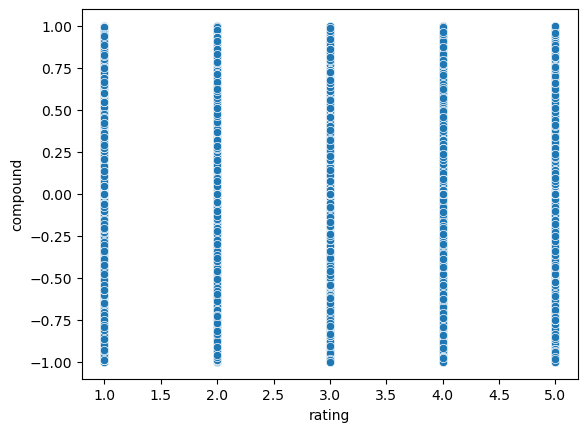

In [22]:
# Create a line plot
sns.scatterplot(base , x = 'rating', y = 'compound')

# Show the plot
plt.show()

> The distribution of the scores is higher than expected so look at boxplot instead.

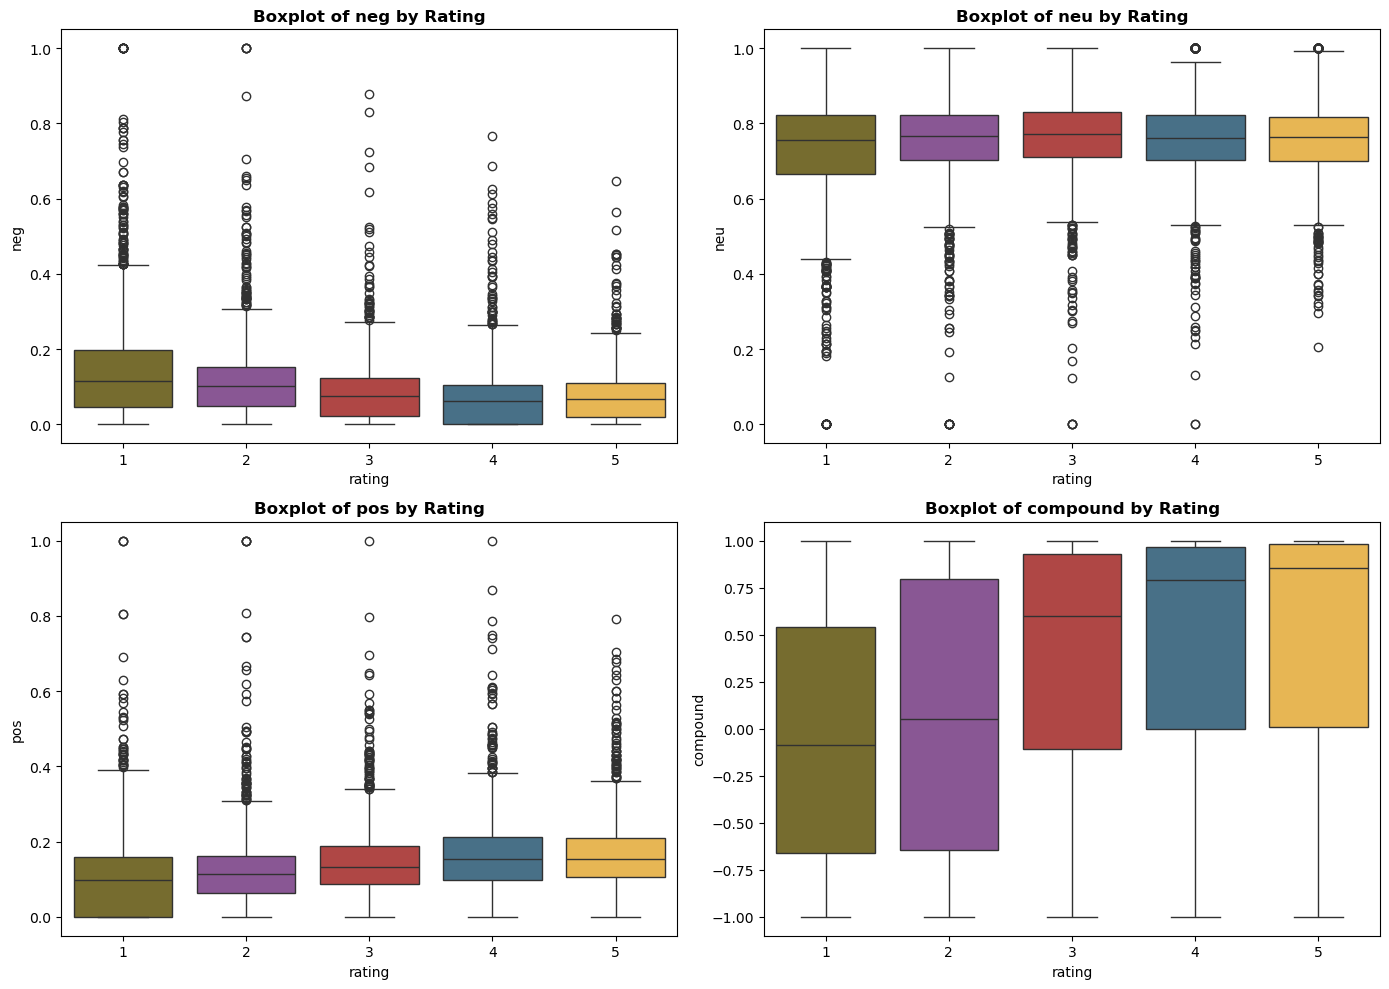

In [73]:
# Create a boxplot for each sentiment column grouped by rating
colours = ['#827423', '#904d9e', '#c13633', '#3d7391', '#ffbe3b'] # hex codes for 5 different ratings
ratings = base['rating'].unique()
ratings.sort()  # Ensure the ratings are sorted

sentiment_columns = ['neg', 'neu', 'pos', 'compound']
plt.figure(figsize=(14, 10))

for i, column in enumerate(sentiment_columns, 1):
    plt.subplot(2, 2, i)
    # Create a dictionary for the palette to map each rating to a color
    palette = {rating: colour for rating, colour in zip(ratings, colours)}
    sns.boxplot(x='rating', 
                y=column, 
                data=base, 
                palette=palette, 
                hue = 'rating', 
                legend = False)
    plt.title(f'Boxplot of {column} by Rating', fontweight='bold')

plt.tight_layout()

# Save the figure with a transparent background
plt.savefig(r'plots/base_boxplots_transparent_background.png', transparent=True)

plt.show()

#### Sentence tokenising
In order to reduce the distribution, start processing the reviews, beginning with tokenising them into sentences

In [26]:
# Have a look at a review
df_k.iloc[1]['review']

'Can 35 Million Book Buyers Be Wrong? Yes.Taking arms against Harry Potter, at this moment, is to emulate Hamlet taking arms against a sea of troubles. By opposing the sea, you won\'t end it. The Harry Potter epiphenomenon will go on, doubtless for some time, as J. R. R. Tolkien did, and then wane.The official newspaper of our dominant counter-culture, The New York Times, has been startled by the Potter books into establishing a new policy for its not very literate book review. Rather than crowd out the Grishams, Clancys, Crichtons, Kings, and other vastly popular prose fictions on its fiction bestseller list, the Potter volumes will now lead a separate children\'s list. J. K. Rowling, the chronicler of Harry Potter, thus has an unusual distinction: She has changed the policy of the policy-maker.Imaginative VisionI read new children\'s literature, when I can find some of any value, but had not tried Rowling until now. I have just concluded the 300 pages of the first book in the series,

In [27]:
# Import tokeniser
from nltk import tokenize

In [28]:
# Tokenise one review and have a look at its sentiment (code from ChatGPT)
sentence_list = tokenize.sent_tokenize(df_k.iloc[1]['review'])
paragraphSentiments = 0.0
for sentence in sentence_list:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<69} {}".format(sentence, str(vs["compound"])))
    paragraphSentiments += vs["compound"]
print("AVERAGE SENTIMENT FOR PARAGRAPH: \t" + str(round(paragraphSentiments / len(sentence_list), 4)))
print("----------------------------------------------------")

Can 35 Million Book Buyers Be Wrong?--------------------------------- -0.4767
Yes.Taking arms against Harry Potter, at this moment, is to emulate Hamlet taking arms against a sea of troubles. -0.4588
By opposing the sea, you won't end it.------------------------------- 0.0
The Harry Potter epiphenomenon will go on, doubtless for some time, as J. R. R. Tolkien did, and then wane.The official newspaper of our dominant counter-culture, The New York Times, has been startled by the Potter books into establishing a new policy for its not very literate book review. 0.0516
Rather than crowd out the Grishams, Clancys, Crichtons, Kings, and other vastly popular prose fictions on its fiction bestseller list, the Potter volumes will now lead a separate children's list. 0.4215
J. K. Rowling, the chronicler of Harry Potter, thus has an unusual distinction: She has changed the policy of the policy-maker.Imaginative VisionI read new children's literature, when I can find some of any value, but had not

Now apply this to all the reviews and see the difference

In [30]:
# Copy of df_k
df_s = df_k.copy()

In [31]:
# Tokenise as sentences and save in the copied df
df_s['tokens'] = df_s['review'].apply(lambda x:tokenize.sent_tokenize(x))

In [32]:
sentiment_columns = ['neg', 'neu', 'pos', 'compound']

# Get polarity score for each sentence as a list
for sent in sentiment_columns:
    df_s[f'token_{sent}'] = df_s['tokens'].apply(lambda x: [analyzer.polarity_scores(sentence)[sent] for sentence in x])

In [33]:
# Get the average for the review and save these in new columns
for sent in sentiment_columns:
    df_s[f'token_avg_{sent}'] = df_s[f'token_{sent}'].apply(lambda x: sum(x)/len(x) if len(x) != 0 else 0)

In [34]:
# Have a look
df_s.head()

,book,rating,review,images,likes,comments,tokens,token_neg,token_neu,token_pos,token_compound,token_avg_neg,token_avg_neu,token_avg_pos,token_avg_compound
0,Harry Potter and the Philosopher’s Stone,1,This is a disgrace to all pure bloods. My head...,0,9254,33,"[This is a disgrace to all pure bloods., My he...","[0.348, 0.167, 0.0, 0.0, 0.0]","[0.652, 0.833, 1.0, 1.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[-0.4939, -0.2023, 0.0, 0.0, 0.0]",0.103000,0.897000,0.000000,-0.139240
1,Harry Potter and the Philosopher’s Stone,1,Can 35 Million Book Buyers Be Wrong? Yes.Takin...,0,421,4,"[Can 35 Million Book Buyers Be Wrong?, Yes.Tak...","[0.341, 0.15, 0.0, 0.034, 0.0, 0.0, 0.0, 0.231...","[0.659, 0.85, 1.0, 0.927, 0.909, 0.958, 0.851,...","[0.0, 0.0, 0.0, 0.038, 0.091, 0.042, 0.149, 0....","[-0.4767, -0.4588, 0.0, 0.0516, 0.4215, 0.1779...",0.040458,0.904792,0.054667,0.118800
2,Harry Potter and the Philosopher’s Stone,1,We don't support transphobes in this house,0,340,19,[We don't support transphobes in this house],[0.273],[0.727],[0.0],[-0.3089],0.273000,0.727000,0.000000,-0.308900
3,Harry Potter and the Philosopher’s Stone,1,Update: 23/8/2018 My review is still hidden fr...,1,237,4,[Update: 23/8/2018 My review is still hidden f...,"[0.0, 0.0, 0.0, 0.236, 0.0, 0.26, 0.0, 0.0, 0....","[1.0, 1.0, 1.0, 0.764, 0.866, 0.74, 0.843, 0.7...","[0.0, 0.0, 0.0, 0.0, 0.134, 0.0, 0.157, 0.284,...","[0.0, 0.0, 0.0, -0.5719, 0.4767, -0.2755, 0.42...",0.040524,0.885571,0.073905,0.102795
4,Harry Potter and the Philosopher’s Stone,1,Pathetic. Really pathetic.Harry Potter is more...,0,200,4,"[Pathetic., Really pathetic.Harry Potter is mo...","[1.0, 0.0, 0.0, 0.163, 0.392, 0.0, 0.104, 0.10...","[0.0, 1.0, 1.0, 0.598, 0.608, 1.0, 0.734, 0.70...","[0.0, 0.0, 0.0, 0.239, 0.0, 0.0, 0.162, 0.191,...","[-0.5719, 0.0, 0.0, 0.2585, -0.7964, 0.0, 0.36...",0.152190,0.743000,0.104857,0.065910


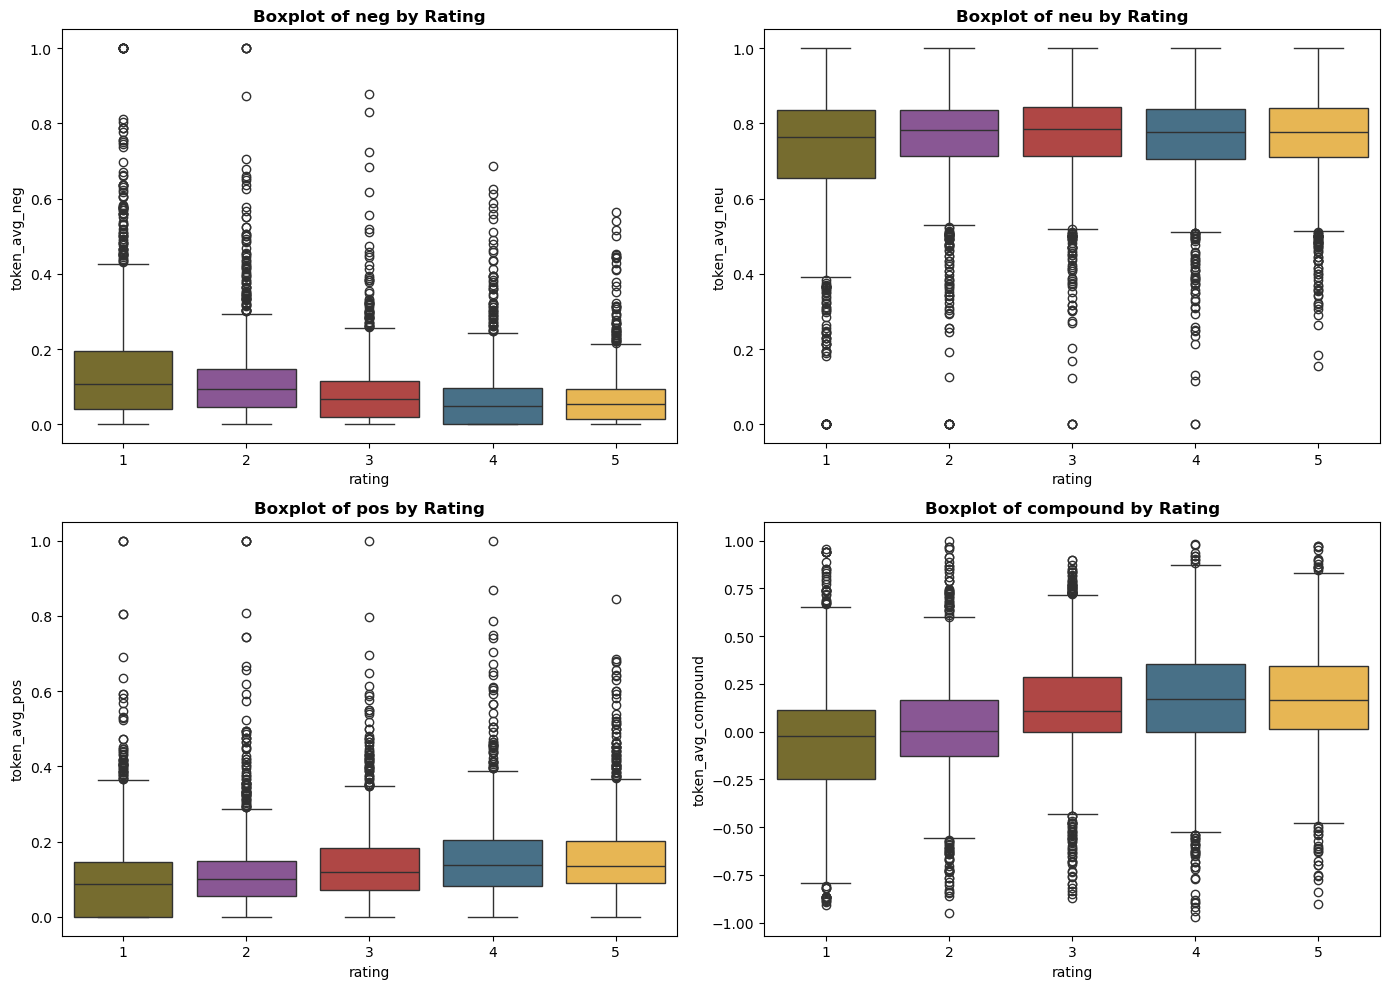

In [75]:
# Create a boxplot for each sentiment column grouped by rating
colours = ['#827423', '#904d9e', '#c13633', '#3d7391', '#ffbe3b'] # hex codes for 5 different ratings
ratings = df_s['rating'].unique()
ratings.sort()  # Ensure the ratings are sorted

sentiment_columns = ['neg', 'neu', 'pos', 'compound']
plt.figure(figsize=(14, 10))

for i, column in enumerate(sentiment_columns, 1):
    plt.subplot(2, 2, i)
    # Create a dictionary for the palette to map each rating to a color
    palette = {rating: colour for rating, colour in zip(ratings, colours)}
    sns.boxplot(x='rating', 
                y=f'token_avg_{column}', 
                data=df_s, 
                palette=palette, 
                hue = 'rating', 
                legend = False)
    plt.title(f'Boxplot of {column} by Rating', fontweight='bold')

plt.tight_layout()

# Save the figure with a transparent background
plt.savefig(r'plots/boxplots_transparent_background.png', transparent=True)

plt.show()

> The spread has decreased. The steepness is not as pronounced

In [37]:
# Save to CSV
df_s.to_csv(r'data/base_analysis_tokenised.csv', encoding='utf-8', index=False)

#### Adapting the Lexion
The reviews have words form the Harry Potter world that the vader lexicon is recognising as neutral. Adding words to the VADER lexicon could help get a better relationship between the ratings and polarity of the sentiment analysis

In [39]:
# Access the lexicon
vader_lexicon = analyzer.lexicon

# Display part of the lexicon (first 20 items)
for i, (word, score) in enumerate(vader_lexicon.items()):
    if i >= 2000:  # Limit to first 20 items
        break
    print(f"{word}: {score}")

$:: -1.5
%): -0.4
%-): -1.5
&-:: -0.4
&:: -0.7
( '}{' ): 1.6
(%: -0.9
('-:: 2.2
(':: 2.3
((-:: 2.1
(*: 1.1
(-%: -0.7
(-*: 1.3
(-:: 1.6
(-:0: 2.8
(-:<: -0.4
(-:o: 1.5
(-:O: 1.5
(-:{: -0.1
(-:|>*: 1.9
(-;: 1.3
(-;|: 2.1
(8: 2.6
(:: 2.2
(:0: 2.4
(:<: -0.2
(:o: 2.5
(:O: 2.5
(;: 1.1
(;<: 0.3
(=: 2.2
(?:: 2.1
(^:: 1.5
(^;: 1.5
(^;0: 2.0
(^;o: 1.9
(o:: 1.6
)':: -2.0
)-':: -2.1
)-:: -2.1
)-:<: -2.2
)-:{: -2.1
):: -1.8
):<: -1.9
):{: -2.3
);<: -2.6
*): 0.6
*-): 0.3
*-:: 2.1
*-;: 2.4
*:: 1.9
*<|:-): 1.6
*\0/*: 2.3
*^:: 1.6
,-:: 1.2
---'-;-{@: 2.3
--<--<@: 2.2
.-:: -1.2
..###-:: -1.7
..###:: -1.9
/-:: -1.3
/:: -1.3
/:<: -1.4
/=: -0.9
/^:: -1.0
/o:: -1.4
0-8: 0.1
0-|: -1.2
0:): 1.9
0:-): 1.4
0:-3: 1.5
0:03: 1.9
0;^): 1.6
0_o: -0.3
10q: 2.1
1337: 2.1
143: 3.2
1432: 2.6
14aa41: 2.4
182: -2.9
187: -3.1
2g2b4g: 2.8
2g2bt: -0.1
2qt: 2.1
3:(: -2.2
3:): 0.5
3:-(: -2.3
3:-): -1.4
4col: -2.2
4q: -3.1
5fs: 1.5
8): 1.9
8-d: 1.7
8-o: -0.3
86: -1.6
8d: 2.9
:###..: -2.4
:$: -0.2
:&: -0.6
:'(: -2.2
:'): 2.3
:'-(

**Assign Scores:**

* Highly Positive: Words that consistently evoke strong positive emotions should have scores closer to +4 (e.g., 2.0 to 3.0).
* Moderately Positive: Words that generally have a positive sentiment but not extremely strong could be scored around +1 to +2.
* Neutral: Words that do not carry strong positive or negative connotations could be scored around 0.
* Moderately Negative: Words with a generally negative sentiment might be scored around -1 to -2.
* Highly Negative: Words that evoke strong negative emotions should have scores closer to -4 (e.g., -2.0 to -3.0).

From: ChatGPT

In [41]:
# Words to add to the lexicon with their polarity score ( mostly characters for now) :
new_words = {
    'magic': 2.0,
    'wizard': 1.5,
    'witch': 1.5,
    'muggle': -1.0,
    'dementor': -2.0,
    'quidditch': 1.5,
    'voldemort': -3.0,
    'hogwarts': 2.0,
    'deathly': -2.0,
    'horcrux': -1.5,
    'gryffindor': 2.0,
    'slytherin': -1.0,
    'hufflepuff': 1.5,
    'ravenclaw': 1.5,
    'dumbledore': 2.5,
    'harry': 2.5,
    'hermione': 2.5,
    'ron': 2.5,
    'snape': -1.5,
    'dobby': 2.0,
    'malfoy': -1.5,
    'dark': -2.0,
    'lord': -1.5,
    'unforgivable': -3.0,
    'curse': -2.5,
    
    "Alastor Moody": 1.5,
    "Mad-Eye":1.5,
    "Arthur Weasley": 2.0,
    "Arthur": 2.0,
    "Bellatrix Lestrange": -3.5,
    "Bill Weasley": 2.0,
    "Bill": 2.0,
    "Cedric Diggory": 2.0,
    "Cedric":2.0,
    "Cho Chang": 1.0,
    "Cho": 1.0,
    "Draco Malfoy": -1.0,
    "Draco": -1.0,
    "Fleur Delacour": 1.5,
    "Fleur": 1.5,
    "Fred Weasley": 2.0,
    "Fred":2.0,
    "Gabrielle Delacour": 1.0,
    "Gellert Grindelwald": -2.7,
    "Grindelwald": -2.7,
    "Ginny Weasley": 1.7,
    "Ginny": 1.7,
    "Griphook": 0.0,
    "Harry Potter": 2.5,
    "Harry": 2.5,
    "Hermione Granger": 2.0,
    "Hermione": 2.5,
    "Granger":2.5,
    "Horace Slughorn": 0.9,
    "Slughorn": 0.9,
    "Horace": 0.9,
    "Kingsley Shacklebolt": 2.3,
    "Kingsley":2.3,
    "Luna Lovegood": 1.5,
    "Luna":1.5,
    "Lovegood": 1.0,
    "Minerva McGonagall": 2.3,
    "Minerva": 2.3,
    "McGonagall": 2.2,
    "Molly Weasley": 2.0,
    "Molly": 2.0,
    "Neville Longbottom": 1.7,
    "Neville":1.7,
    "Longbottom":1.5,
    "Nymphadora Tonks": 1.8,
    "Tonks":1.8,
    "Oliver Wood": 1.0,
    "Wood":1.0,
    "Oliver": 1.0,
    "Pansy Parkinson": -1.5,
    "Parkinson": -1.5,
    "Peter Pettigrew": -2.7,
    "Pettigrew":-2.7,
    "Remus Lupin": 2.1,
    "Lupin": 2.1,
    "Remus": 2.1,
    "Rita Skeeter": -2.5,
    "Rita": -2.5,
    "Skeeter": -2.5,
    "Ron Weasley": 2.3,
    "Ron": 2.3,
    "Rubeus Hagrid": 2.3,
    "Hagrid": 2.3,
    "Severus Snape": -0.5,
    "Sirius Black": 2.0,
    "Black": -1.0,
    "Sirius": 2.0,
    "Teddy Lupin": 0.8,
    "Teddy": 0.8,
    "Viktor Krum": 1.0,
    "Krum": 1.0,
    "Winky": -0.5,
    "Xenophilius Lovegood": 1.0,
    "Zacharias Smith": -1.5,
    "Argus Filch": -1.0,
    "Alicia Spinnet": 1.0,
    "Amycus Carrow": -2.5,
    "Anthony Goldstein": 1.5,
    "Apolline Delacour": 1.5,
    "Aragog": -1.5,
    "Arabella Figg": 1.0,
    "Ariana Dumbledore": 1.0,
    "Augusta Longbottom": 1.5,
    "Avery": -2.0,
    "Bathilda Bagshot": 1.0,
    "Blaise Zabini": 0.0,
    "Charity Burbage": -2.0,
    "Charlie Weasley": 1.5,
    "Colin Creevey": 1.0,
    "Cormac McLaggen": -1.0,
    "Cornelius Fudge": -1.5,
    "Dedalus Diggle": 1.5,
    "Demelza Robins": 1.0,
    "Dennis Creevey": 1.0,
    "Dobby": 1.5,
    "Dolores Umbridge": -3.0,
    "Umbridge": -3.0,
    "Dorcas Meadowes": 1.5,
    "Dudley Dursley": -0.5,
    "Dugald McPhail": 0.0,
    "Elphias Doge": 1.5,
    "Ernie Macmillan": 1.0,
    "Fenrir Greyback": -2.5,
    "George Weasley": 2.0,
    "Gregory Goyle": -1.0,
    "Helga Hufflepuff": 2.0,
    "James Potter": 2.0,
    "Lavender Brown": 1.0,
    "Lily Potter": 2.0,
    "Lucius Malfoy": -2.0,
    "Ludovic Bagman": 0.0,
    "Madam Pomfrey": 1.0,
    "Marietta Edgecombe": -1.0,
    "Marvolo Gaunt": -2.5,
    "Moaning Myrtle": -1.5,
    "Narcissa Malfoy": 1.5,
    "Nearly Headless Nick": 1.0,
    "Norbert": 0.5,
    "Olympe Maxime": 1.0,
    "Padma Patil": 1.0,
    "Parvati Patil": 1.0,
    "Peeves": -1.5,
    "Penelope Clearwater": 1.0,
    "Percy Weasley": -1.0,
    "Phineas Nigellus": -1.5,
    "Pomona Sprout": 1.0,
    "Poppy Pomfrey": 1.0,
    "Quirinus Quirrell": -2.5,
    "Regulus Black": 1.5,
    "Rolanda Hooch": 1.0,
    "Romilda Vane": -1.0,
    "Rowena Ravenclaw": 2.0,
    "Rufus Scrimgeour": -1.5,
    "Salazar Slytherin": 2.0,
    "Seamus Finnigan": 1.0,
    "Silvanus Kettleburn": 1.0,
    "Stan Shunpike": -1.5,
    "Susan Bones": 1.0,
    "Sybill Trelawney": -1.5,
    "The Sorting Hat": 1.0,
    "Tom Riddle": -3.5,
    "Vernon Dursley": -1.5,
    "Lord Voldemort": -4.0,
    "Walden Macnair": -2.0,
    "Wilhelmina Grubbly-Plank": 1.0,
    "Yaxley": -2.0
}

In [42]:
# Update lexicon with new words
analyzer.lexicon.update(new_words)

In [43]:
# Copy of df_k
df_s2 = df_k.copy()

In [44]:
# Tokenise as sentences
df_s2['tokens'] = df_s2['review'].apply(lambda x:tokenize.sent_tokenize(x))

In [45]:
sentiment_columns = ['neg', 'neu', 'pos', 'compound']

# Get polarity score for each sentence as a list
for sent in sentiment_columns:
    df_s2[f'token_{sent}'] = df_s2['tokens'].apply(lambda x: [analyzer.polarity_scores(sentence)[sent] for sentence in x])

In [46]:
# Get the average for the review
for sent in sentiment_columns:
    df_s2[f'token_avg_{sent}'] = df_s2[f'token_{sent}'].apply(lambda x: sum(x)/len(x) if len(x) != 0 else 0)

In [47]:
# Have a look
df_s2.head(3)

,book,rating,review,images,likes,comments,tokens,token_neg,token_neu,token_pos,token_compound,token_avg_neg,token_avg_neu,token_avg_pos,token_avg_compound
0,Harry Potter and the Philosopher’s Stone,1,This is a disgrace to all pure bloods. My head...,0,9254,33,"[This is a disgrace to all pure bloods., My he...","[0.348, 0.167, 0.0, 0.0, 0.0]","[0.652, 0.833, 1.0, 0.222, 1.0]","[0.0, 0.0, 0.0, 0.778, 0.0]","[-0.4939, -0.2023, 0.0, 0.5423, 0.0]",0.103000,0.7414,0.155600,-0.030780
1,Harry Potter and the Philosopher’s Stone,1,Can 35 Million Book Buyers Be Wrong? Yes.Takin...,0,421,4,"[Can 35 Million Book Buyers Be Wrong?, Yes.Tak...","[0.341, 0.133, 0.0, 0.033, 0.0, 0.0, 0.0, 0.23...","[0.659, 0.711, 1.0, 0.864, 0.909, 0.906, 0.749...","[0.0, 0.156, 0.0, 0.104, 0.091, 0.094, 0.251, ...","[-0.4767, 0.128, 0.0, 0.5719, 0.4215, 0.4497, ...",0.039542,0.8610,0.099458,0.284738
2,Harry Potter and the Philosopher’s Stone,1,We don't support transphobes in this house,0,340,19,[We don't support transphobes in this house],[0.273],[0.727],[0.0],[-0.3089],0.273000,0.7270,0.000000,-0.308900


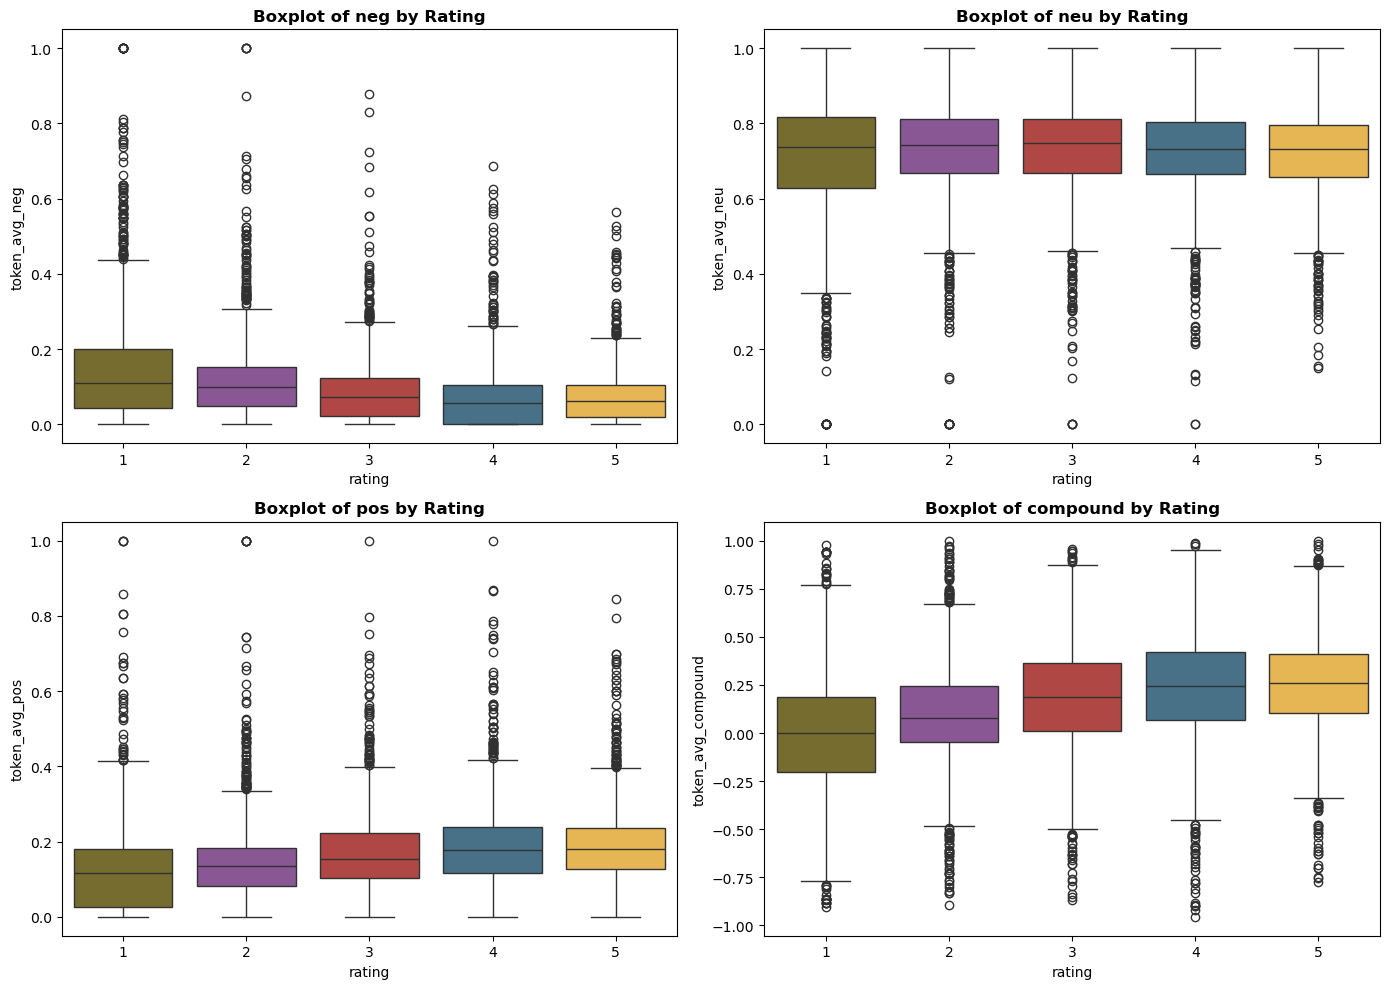

In [77]:
# Create a boxplot for each sentiment column grouped by rating
colours = ['#827423', '#904d9e', '#c13633', '#3d7391', '#ffbe3b'] # hex codes for 5 different ratings
ratings = df_s2['rating'].unique()
ratings.sort()  # Ensure the ratings are sorted

sentiment_columns = ['neg', 'neu', 'pos', 'compound']
plt.figure(figsize=(14, 10))

for i, column in enumerate(sentiment_columns, 1):
    plt.subplot(2, 2, i)
    # Create a dictionary for the palette to map each rating to a color
    palette = {rating: colour for rating, colour in zip(ratings, colours)}
    sns.boxplot(x='rating', 
                y=f'token_avg_{column}', 
                data=df_s2, 
                palette=palette, 
                hue = 'rating', 
                legend = False)
    plt.title(f'Boxplot of {column} by Rating', fontweight='bold')

plt.tight_layout()

# Save the figure with a transparent background
plt.savefig(r'plots/final_boxplots_transparent_background.png', transparent=True)

plt.show()

> Don't see much change from previous graphs. (perhaps due to stemming words??)

In [50]:
# Save to CSV
df_s2.to_csv(r'data/analysis_tokenised_newwords.csv', encoding='utf-8', index=False)